# Loan data -from prosper- exploration
## by Fatima Elmalla

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This project is going to focus on the interest rate and its realtion to the following variables: Term, ListingCategory, EmploymentStatus, ProsperRating,StatedMonthlyIncome, LoanOriginalAmount. the data set can be found [here](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv). and for more information abput the variables check [this](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#loading the dataset 
df= pd.read_csv('prosperLoanData.csv')
print(df.head())

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18             

In [3]:
#investigating the shape of the dataset 
df.shape

(113937, 81)

In [4]:
#looking at more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#Separating the features of interest in a new dataframe
df_sub = df[['Term','ListingCategory (numeric)','EmploymentStatus','BorrowerRate','ProsperRating (Alpha)','StatedMonthlyIncome', 'LoanOriginalAmount']]

1. Term:The length of the loan expressed in months.

2. ListingCategory (numeric):The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

3. EmploymentStatus:The employment status of the borrower at the time they posted the listing.

4. BorrowerRate:The Borrower's interest rate for this loan. 

5. ProsperRating (Alpha):The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

6. StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created.

7. LoanOriginalAmount:The origination amount of the loan.

In [6]:
#looking at the first 5 rows of the data
df_sub.head()

Term  ListingCategory (numeric) EmploymentStatus  BorrowerRate  \
0    36                          0    Self-employed        0.1580   
1    36                          2         Employed        0.0920   
2    36                          0    Not available        0.2750   
3    36                         16         Employed        0.0974   
4    36                          2         Employed        0.2085   

  ProsperRating (Alpha)  StatedMonthlyIncome  LoanOriginalAmount  
0                   NaN          3083.333333                9425  
1                     A          6125.000000               10000  
2                   NaN          2083.333333                3001  
3                     A          2875.000000               10000  
4                     D          9583.333333               15000

In [7]:
#renaming the columns to be easier to work with 
df_sub = df_sub.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'})

In [8]:
#ensuring the changes 
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 113937 non-null  int64  
 1   ListingCategory      113937 non-null  int64  
 2   EmploymentStatus     111682 non-null  object 
 3   BorrowerRate         113937 non-null  float64
 4   ProsperRating        84853 non-null   object 
 5   StatedMonthlyIncome  113937 non-null  float64
 6   LoanOriginalAmount   113937 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 6.1+ MB


In [9]:
#invistigating the statical sammary of the data
df_sub.describe()

Term  ListingCategory   BorrowerRate  StatedMonthlyIncome  \
count  113937.000000    113937.000000  113937.000000         1.139370e+05   
mean       40.830248         2.774209       0.192764         5.608026e+03   
std        10.436212         3.996797       0.074818         7.478497e+03   
min        12.000000         0.000000       0.000000         0.000000e+00   
25%        36.000000         1.000000       0.134000         3.200333e+03   
50%        36.000000         1.000000       0.184000         4.666667e+03   
75%        36.000000         3.000000       0.250000         6.825000e+03   
max        60.000000        20.000000       0.497500         1.750003e+06   

       LoanOriginalAmount  
count        113937.00000  
mean           8337.01385  
std            6245.80058  
min            1000.00000  
25%            4000.00000  
50%            6500.00000  
75%           12000.00000  
max           35000.00000

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of my interest in the dataset is the borrower interest rate. I'm going to explore what affect the interest rate of the borrower.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>the feautes I'm going to use in the exploration are Term, ListingCategory, EmploymentStatus, ProsperRating, StatedMonthlyIncome, LoanOriginalAmount.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Exploring the numerical varibles 
> Histograms are used to explore the distribution of numerical variables. 
#### Distribution of borrower interest rate

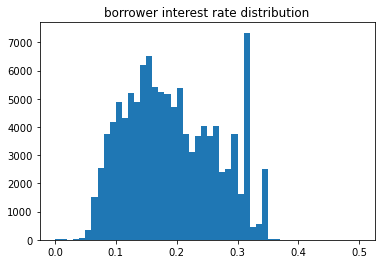

In [10]:
#Distribution of borrower interest rate
bins = np.arange(0, df_sub['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data = df_sub, x = 'BorrowerRate', bins = bins);
plt.title('borrower interest rate distribution');

> the distibution of the borrower's rate looks multimodal with a peak between 0.1 and 0.2 and the highest peak between 0.3 and 0.31. 

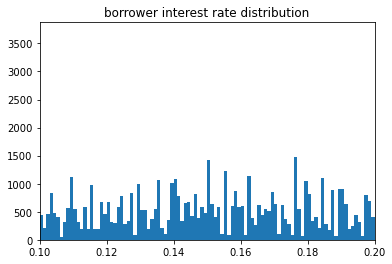

In [11]:
#focusing on the area between 0.1 and 0.2
bins = np.arange(0, df_sub['BorrowerRate'].max()+0.001, 0.001)
plt.hist(data = df_sub, x = 'BorrowerRate', bins = bins);
plt.title('borrower interest rate distribution');
plt.xlim([0.1,0.2]);

#### Distribution of Stated Monthly Income


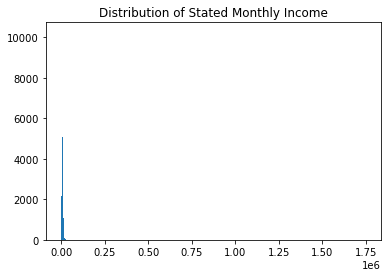

In [12]:
#Distribution of Stated Monthly Income
bins = np.arange(0, df_sub['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins = bins);
plt.title('Distribution of Stated Monthly Income');

>Most of the data are concentrated in the range 0 to 50000 and the frequency of the larger values are significantly low.

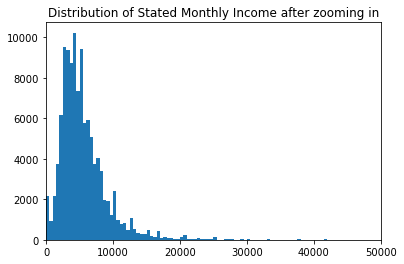

In [13]:
#Distribution of Stated Monthly Income after zooming in 
bins = np.arange(0, df_sub['StatedMonthlyIncome'].max()+500, 500)
plt.hist(data = df_sub, x = 'StatedMonthlyIncome', bins = bins);
plt.title('Distribution of Stated Monthly Income after zooming in');
plt.xlim([0,50000]);

> the data looks very right-skewed and the frequency of data less than 30000 is significantly low

In [14]:
#calculate the percentage of the loans with monthly income greater than 30000 
df_sub[df['StatedMonthlyIncome']>30000].count()/df_sub['StatedMonthlyIncome'].count()

Term                   0.002870
ListingCategory        0.002870
EmploymentStatus       0.002791
BorrowerRate           0.002870
ProsperRating          0.002185
StatedMonthlyIncome    0.002870
LoanOriginalAmount     0.002870
dtype: float64

> the percentage of Stated Monthly Income greater than 30000 is only 0.002870 which suggests that they are outliers. 

In [15]:
#dropping the rows with Stated Monthly Income greater than 30000 
df_sub=df_sub[df['StatedMonthlyIncome']<=30000]

In [16]:
#checking that the ouliers are removed successfully
df_sub[df['StatedMonthlyIncome']>30000].count()

<ipython-input-16-4b396a14b125>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sub[df['StatedMonthlyIncome']>30000].count()


Term                   0
ListingCategory        0
EmploymentStatus       0
BorrowerRate           0
ProsperRating          0
StatedMonthlyIncome    0
LoanOriginalAmount     0
dtype: int64

In [17]:
#looking at the statistics of the dataset after the dropped rows
df_sub.describe()

Term  ListingCategory   BorrowerRate  StatedMonthlyIncome  \
count  113610.000000    113610.000000  113610.000000        113610.000000   
mean       40.833377         2.773295       0.192846          5453.105542   
std        10.435754         3.994692       0.074817          3508.811717   
min        12.000000         0.000000       0.000000             0.000000   
25%        36.000000         1.000000       0.134000          3196.666667   
50%        36.000000         1.000000       0.184000          4666.666667   
75%        36.000000         3.000000       0.250000          6750.000000   
max        60.000000        20.000000       0.497500         30000.000000   

       LoanOriginalAmount  
count       113610.000000  
mean          8316.818326  
std           6224.842790  
min           1000.000000  
25%           4000.000000  
50%           6400.000000  
75%          12000.000000  
max          35000.000000

#### Distribution of  Loan Original Amount

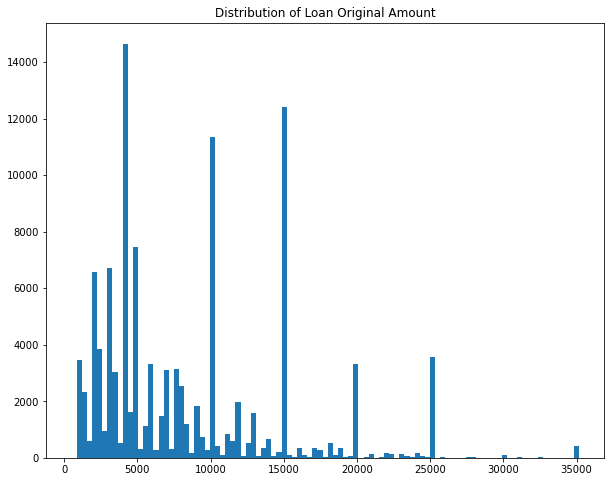

In [18]:
#Distribution of Loan Original Amount
plt.figure(figsize=[10,8])
bins = np.arange(500, df_sub['LoanOriginalAmount'].max()+350, 350)
plt.hist(data = df_sub, x = 'LoanOriginalAmount', bins = bins);
plt.title('Distribution of Loan Original Amount');


> the graph has very high peaks at 4K, 10K, and 15K. and relatively low peaks at 1k,2k,3k,20k and 25k. The graph looks multiodal.

### Exploring Categorical varibles 
> Bar Charts are used to explore the distribution of categorical variables. 
#### Distribution of Employment Status

In [19]:
#looking at the unique values of Employment Status and their count 
df_sub['EmploymentStatus'].value_counts()

Employed         67135
Full-time        26297
Self-employed     6076
Not available     5334
Other             3805
Part-time         1088
Not employed       835
Retired            794
Name: EmploymentStatus, dtype: int64

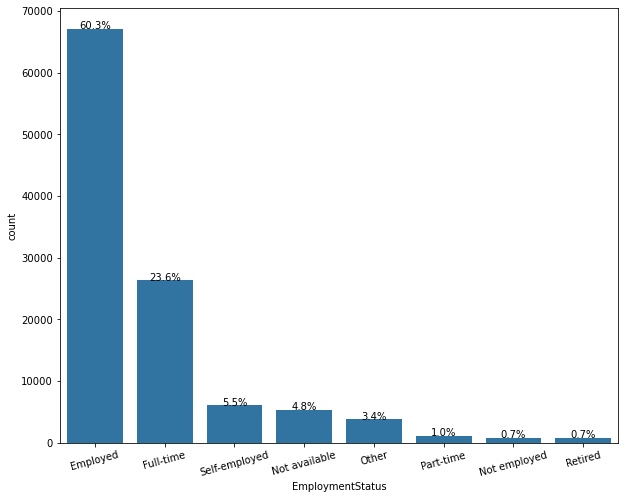

In [20]:
#getting the unique values of the EmploymentStatus column and their count 
freq = df_sub['EmploymentStatus'].value_counts()
employ_order = freq.index

#defining the base color to be used in the graphs 
base_color = sb.color_palette()[0]

#plotting the distribution of EmploymentStatus
plt.figure(figsize=[10,8])
sb.countplot(data=df_sub, x='EmploymentStatus', color=base_color, order=employ_order);


# Returns the sum of all not-null values in `EmploymentStatus` column
n_df = df_sub['EmploymentStatus'].value_counts().sum()
employ_counts = df_sub['EmploymentStatus'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=15) 

# Printing the percentage above each bar
for loc, label in zip(locs, labels):
    count = employ_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

> majority of the borrowers were employed with percentage of 60.3%. on the other hand, not-employed and retired shared the lowest percentage with 0.7%.

#### Distribution of Prosper Rating

In [21]:
# Converting  ProsperRating into ordered categorical types
Prosper_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = Prosper_order)
df_sub['ProsperRating'] = df_sub['ProsperRating'].astype(ordered_var)

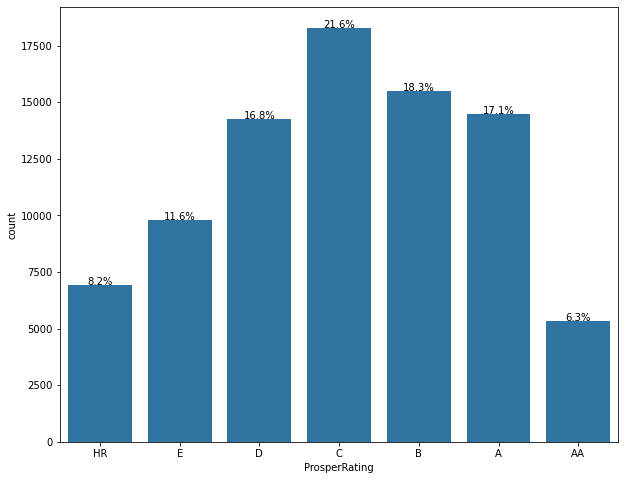

In [22]:
#plotting the distribution of ProsperRating
plt.figure(figsize=[10,8])
sb.countplot(data=df_sub, x='ProsperRating', color=base_color);


# Returns the sum of all not-null values in `ProsperRating` column
n_df = df_sub['ProsperRating'].value_counts().sum()
employ_counts = df_sub['ProsperRating'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# Printing the percentage above each bar
for loc, label in zip(locs, labels):
    count = employ_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

>Rating C has the highest frequency 21.6% and AA has the lowest frequency 6.3%.

#### Distribution of Term variable

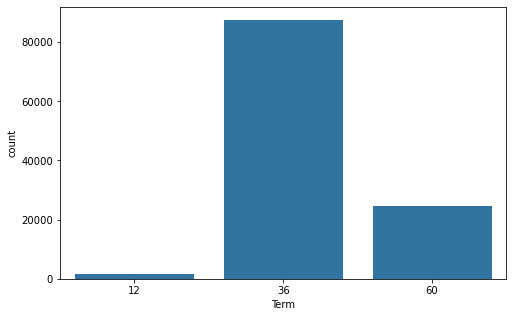

In [23]:
#plotting the distribution of Term column 
plt.figure(figsize=[8,5])
sb.countplot(data=df_sub, x='Term', color=base_color);

>majority of loans are for 36 months and only few segment of the loans are for 12 months. 

#### Distribution of Listing Category variable

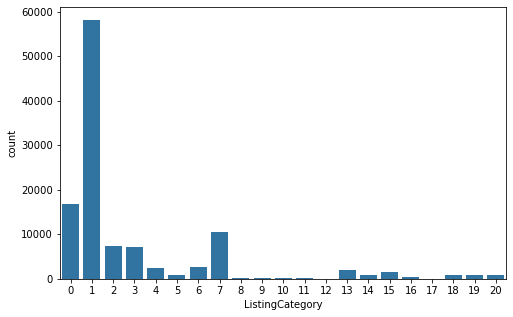

In [24]:
#plotting the distribution of Listing Category column 
plt.figure(figsize=[8,5])
sb.countplot(data=df_sub, x='ListingCategory', color=base_color);


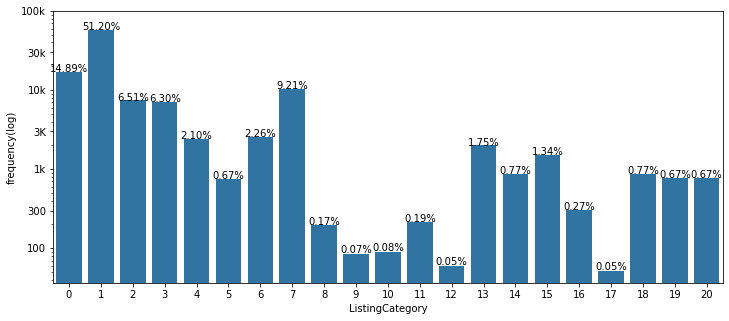

In [25]:
#chaning y axis scale for better insight on the data
plt.figure(figsize=[12,5])
sb.countplot(data=df_sub, x='ListingCategory', color=base_color);
plt.yscale('log')

plt.yticks([100,300, 1e3, 3e3 ,1e4,3e4, 1e5], [100,300, '1k','3K', '10k','30k', '100k'])

plt.ylabel('frequency(log)');




# Returns the sum of all not-null values in `ListingCategory` column
n_df = df_sub['ListingCategory'].value_counts().sum()
employ_counts = df_sub['ListingCategory'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# Printing the percentage above each bar
i=0
for loc, label in zip(locs, labels):
    count = employ_counts[i]
    pct_string = '{:0.2f}%'.format(100*count/n_df)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    i+=1

>listing category 1 (Debt Consolidation) has the highest frequency with percentage 51.20%. On the other hand, listing category 17(RV) has the lowest frequency with percentage 0.05%.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the distribution of the borrower's rate looks multimodal with a peak between 0.1 and 0.2 and the highest peak between 0.3 and 0.31 with most of the data lying between 0.05 and 0.35. there is no transformation needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>1. In the distribution of Stated Monthly Income, most of the data are concentrated in the range 0 to 50000 and the frequency of the larger values are significantly low. the data looks very right-skewed and the frequency of data less than 30000 is significantly low. the percentage of Stated Monthly Income greater than 30000 is only 0.002870 which suggests that they are outliers either they are fake or real but not relevant to the analysis. those outliers needed to be dropped not to affect the analysis.
>2. In the distribution of Loan Original Amount, the graph has very high peaks at 4K, 10K, and 15K. and relatively low peaks at 1k,2k,3k,20k, and 25k. there is no transformation needed.
>3. In the distribution of Employment Status, the majority of the borrowers were employed with a percentage of 60.3%. on the other hand, not-employed and retired shared the lowest percentage with 0.7%. there is no transformation needed to be done.
>4. In the distribution of Prosper Rating, Rating C has the highest frequency 21.6% and AA has the lowest frequency 6.3%. there is no transformation needed to be done.
>5. In the distribution of the Term variable, the majority of loans are for 36 months and only a few segments of the loans are for 12 months. there is no transformation needed.
>6. listing category 1 (Debt Consolidation) has the highest frequency with a percentage of 51.20%. On the other hand, listing category 17(RV) has the lowest frequency with a percentage of 0.05%. log transformation of the y axis needed to be done. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [26]:
#defining the numerical and categorical variables 
categoric_vars = ['EmploymentStatus','ProsperRating', 'Term', 'ListingCategory']
num_vars=['StatedMonthlyIncome','BorrowerRate','LoanOriginalAmount']

### Borrower rate vs LoanOriginalAmount

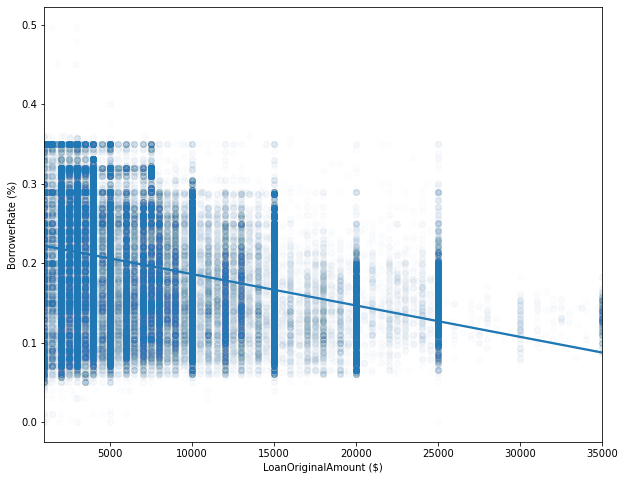

In [27]:
#drawing the Borrower rate vs Loan Original Amount
plt.figure(figsize=[10,8])
sb.regplot(data = df_sub, x = 'LoanOriginalAmount', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.xlabel('LoanOriginalAmount ($)')
plt.ylabel('BorrowerRate (%)');

> the graph shows a negative corelation between borrower interest rate and loan original amount. 

### Borrower rate vs Stated Monthly Income

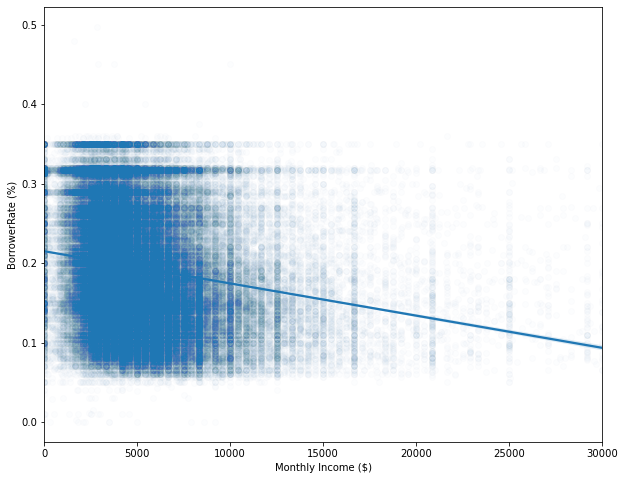

In [28]:
#drawing Borrower rate vs Stated Monthly Income
plt.figure(figsize=[10,8])
sb.regplot(data = df_sub, x = 'StatedMonthlyIncome', y = 'BorrowerRate', scatter_kws={'alpha':0.01});
plt.xlabel('Monthly Income ($)')
plt.ylabel('BorrowerRate (%)');

>Most of the loaner's monthly income are between  2k and 10k dollars. the graph shows a negative corelation between borrower interest rate and Stated Monthly Income. the inerest rate of the borrower's decreases with the increase of the monthly income of the borrower.

### Borrower's rate vs ProsperRating

<AxesSubplot:xlabel='ProsperRating', ylabel='BorrowerRate'>

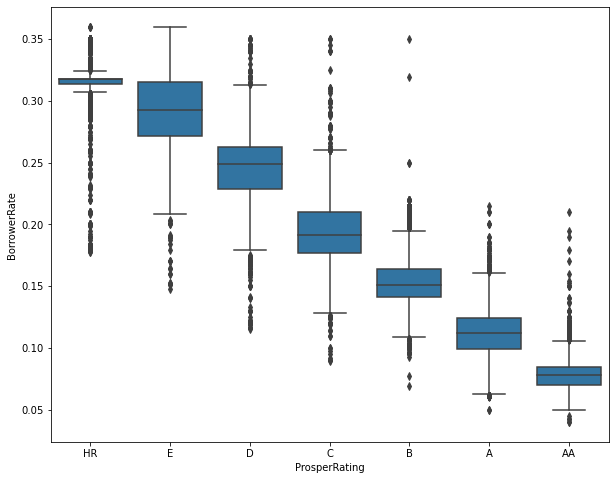

In [29]:
#plotting the relation between the prosper rating and the interest rate 
plt.figure(figsize=[10,8])
sb.boxplot(data=df_sub, x='ProsperRating', y='BorrowerRate', color=base_color)


>The borrower interest rate for high risk borrowers is significantly lower than low risk borrowers.


### Borrower's rate vs Term 

<AxesSubplot:xlabel='Term', ylabel='BorrowerRate'>

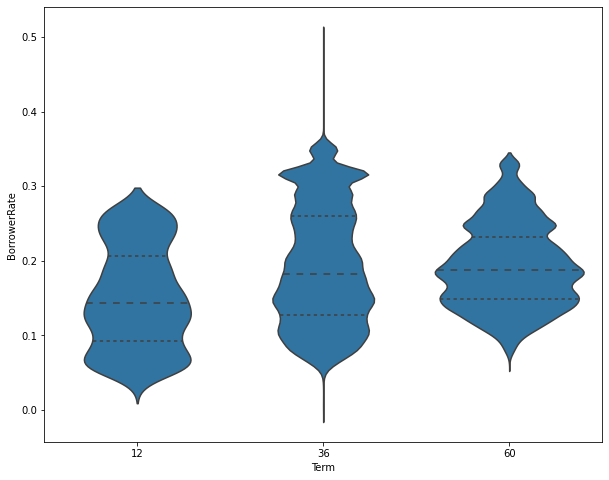

In [30]:
#plotting the relation between the interest rate and loan length 
plt.figure(figsize=[10,8])
sb.violinplot(data=df_sub, x='Term', y='BorrowerRate', color=base_color, inner='quartile')

>36 months loan has the widest distrbution with some outliers while 60 months loans has the heighest mean. 

### Borrower's rate vs ListingCategory

<AxesSubplot:xlabel='ListingCategory', ylabel='BorrowerRate'>

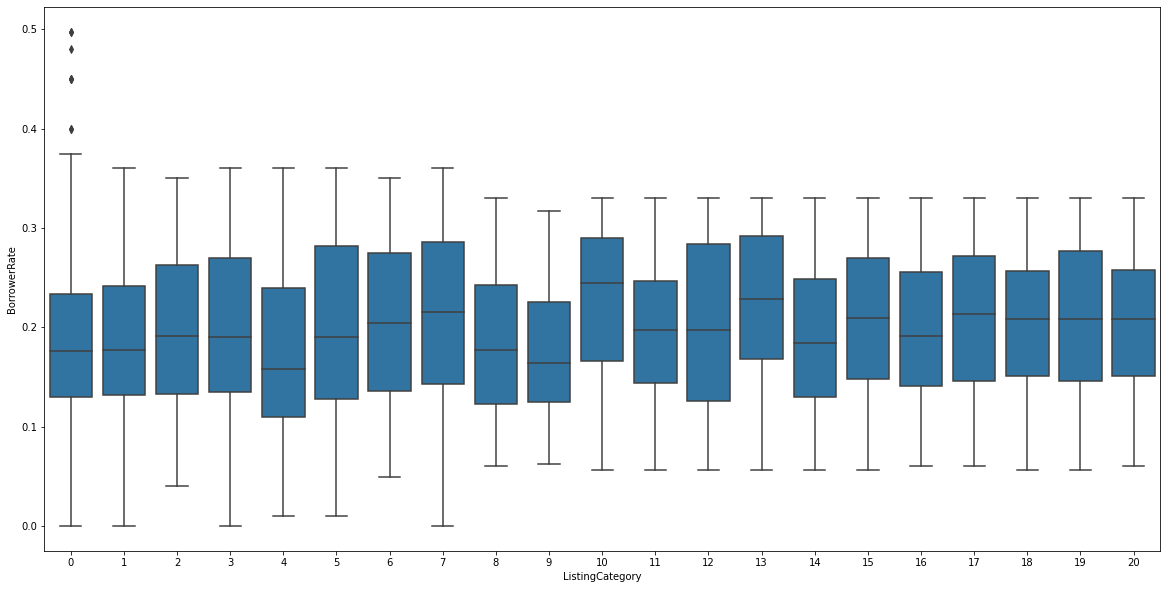

In [31]:
#plotting the relation between the interest rate and ListingCategory
plt.figure(figsize=[20,10])
sb.boxplot(data=df_sub, x='ListingCategory', y='BorrowerRate', color=base_color)


> the distribution of category listing versus borrower interest rate is almost uniform.

### Borrower's rate vs EmploymentStatus

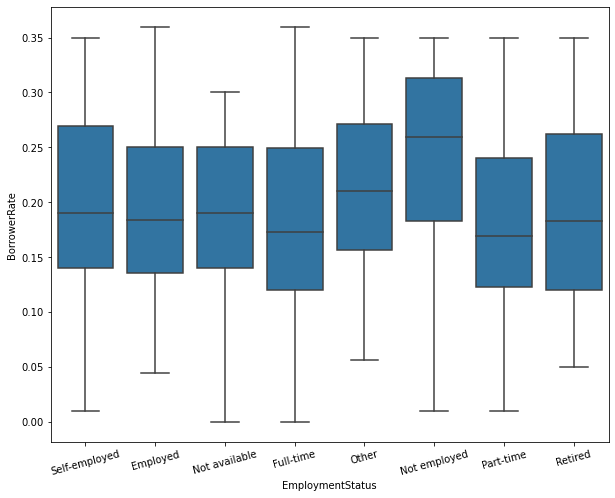

In [32]:
#plotting the relation between the interest rate and EmploymentStatus
plt.figure(figsize=[10,8])
sb.boxplot(data=df_sub, x='EmploymentStatus', y='BorrowerRate', color=base_color)
plt.xticks(rotation=15);

>Not employed borrowers has the highest borrower interest rate. however the distribution is quite uniform.

### LoanOriginalAmount vs Stated Monthly Income

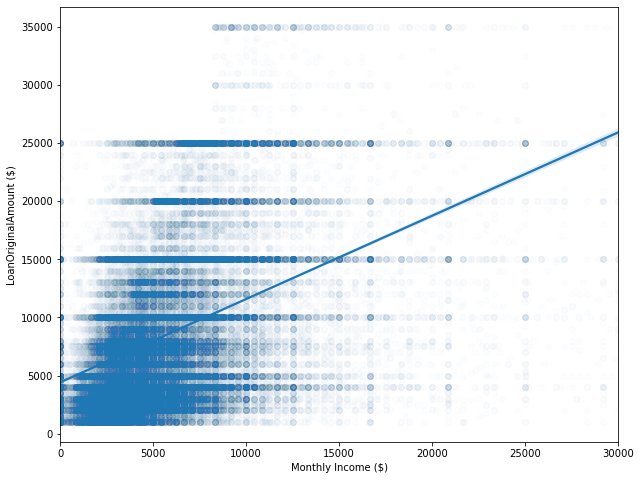

In [33]:
#LoanOriginalAmount vs Stated Monthly Income
plt.figure(figsize=[10,8])
sb.regplot(data = df_sub, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', scatter_kws={'alpha':0.01});
plt.xlabel('Monthly Income ($)')
plt.ylabel('LoanOriginalAmount ($)');

>the original amount of the loan has a positive corelation witht the monthly income of the borrower. the original amount of the loan increases with the increase of the monthly income of the borrower

### LoanOriginalAmount vs Term 

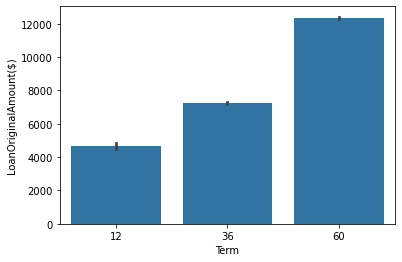

In [34]:
#plotting the relation between the original amount of the loan and the length of the loan
sb.barplot(data=df_sub, x='Term', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)');

> as expected the greater the original loan amount,the longer the term of the loan. the term and orignal amount of the loan have positive corelation. 

### LoanOriginalAmount vs ProsperRating

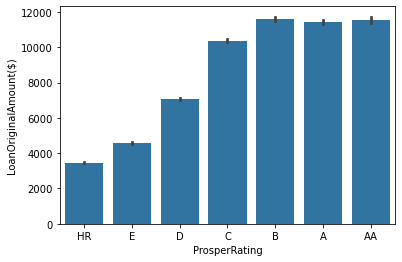

In [35]:
#plotting the relation between the original amount of the loan and  ProsperRating
sb.barplot(data=df_sub, x='ProsperRating', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount($)');

>the level of risk increase with the increase of the original amount of the loan. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> borrower interest rate and the original amount of the loan have negative corelation thus the interest rate increase with the decrease of the original amount of the loan. similarly, the monthly income of the borrower has negative corelation with the interest rate. thus, interest rate increase with the decrease of the monthly income. the prosper rating directly affects the interest rate. the higher the risk, the lower the interest rate. on the other hand, listing category, term and employment satuts have no significant efffect on the interest rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the original amount of the loan is positively correlated to the monthly income of the borrower. the original amount of the loan increase with the increase of the monthly income of the borrower. as expected, the higher the original amount of the loan, the longer the length of the loan. surprisingly, the the higher the level of risk, the higher the original amount of the loan.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### BorrowerRate vs StatedMonthlyIncome vs LoanOriginalAmount

<Figure size 1440x1440 with 0 Axes>

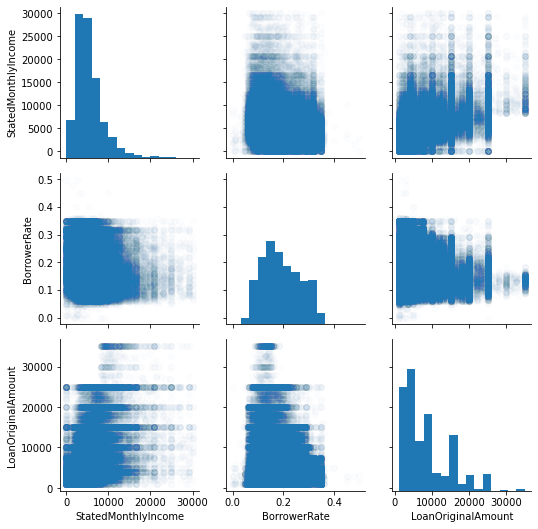

In [36]:
#a sample is taken since the data is to large to be plotted in plot matrix 
sample = df_sub.sample(4000)
plt.figure(figsize=[20,20])
g = sb.PairGrid(data = df_sub, vars = num_vars)
g.map_diag(plt.hist, bins=15)
g.map_offdiag(plt.scatter, alpha=0.01)

<AxesSubplot:>

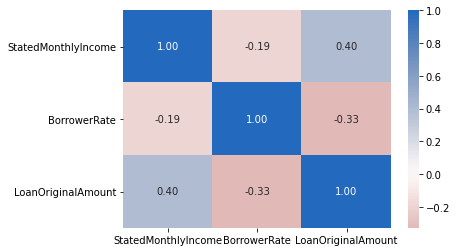

In [37]:
#correlation matrix of the numrical variables 
sb.heatmap(df_sub[num_vars].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

>the correlation of interest rate and both original amount and monthly income is negative.

### EmploymentStatus vs BorrowerRate clustered by Term

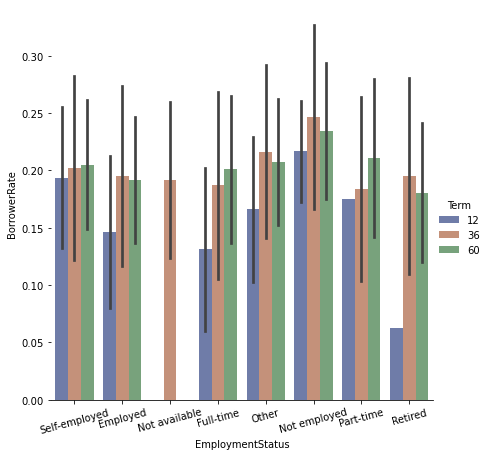

In [38]:
#plotting the relation EmploymentStatus vs BorrowerRate clustered by Term
g = sb.catplot(data=df_sub, kind="bar", x="EmploymentStatus", y="BorrowerRate", hue="Term",ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
plt.xticks(rotation=15);


>not employed borrowers has the highest interest rate with loan length equal 36 months

### LoanOriginalAmount vs interest rate vs Term

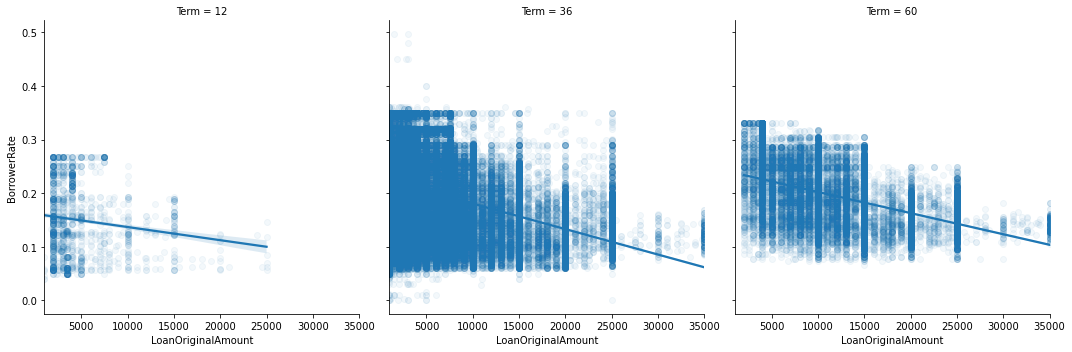

In [39]:
#plotting the effect of term on the relation between the loan amount and prosper rating 
g = sb.FacetGrid(data = df_sub, col = 'Term', height = 5, 
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha':0.05});

>for all term values, the loan original amount and the interest rate have negative relations. for small term value the correlation is less negative.

### StatedMonthlyIncome vs interest rate vs Term

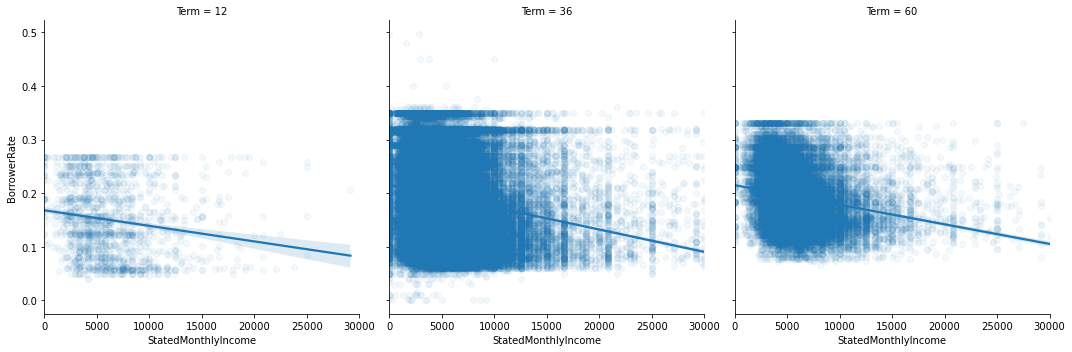

In [40]:
#plotting the effect of term on the relation between interest rate and monthly income 
g = sb.FacetGrid(data = df_sub, col = 'Term', height = 5, 
                margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerRate', scatter_kws={'alpha':0.05});

> Term has no effect on the relatonship between StatedMonthlyIncome and interest rate

### ProsperRating vs Term vs interest rate

Text(0.5, 1.0, 'effect of Term on the relation between prosper rating and interest rate')

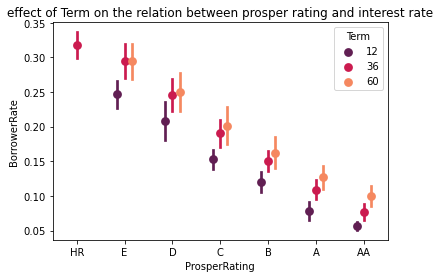

In [41]:
#plotting ProsperRating vs Term vs interest rate
ax = sb.pointplot(data = df_sub, x = 'ProsperRating', y = 'BorrowerRate', hue = 'Term',
                  dodge = 0.3, linestyles = "", ci='sd', palette="rocket")
plt.title('effect of Term on the relation between prosper rating and interest rate')

>the higher the term value the higher the interest rate in each prosper rating category.

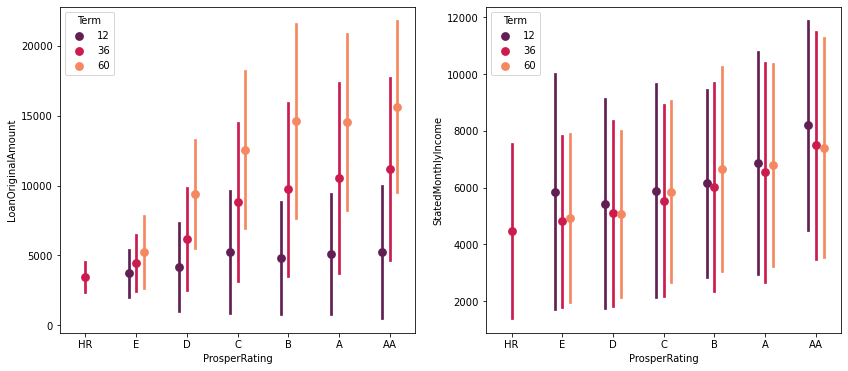

In [42]:

fig, ax = plt.subplots(ncols=2, figsize=[14,6])
#plotting the effect of term on the relation between prosper rating and monthly income 
ax = sb.pointplot(data = df_sub, x = 'ProsperRating', y = 'LoanOriginalAmount', hue = 'Term',
                  dodge = 0.3, linestyles = "", ci='sd', palette="rocket", ax=ax[0])
#plotting the effect of term on the relation between prosper rating and monthly income 
ax = sb.pointplot(data = df_sub, x = 'ProsperRating', y = 'StatedMonthlyIncome', hue = 'Term',
                  dodge = 0.3, linestyles = "", ci='sd', palette="rocket");

>term has no effect on monthly income vs prosper rating. on the other hand, higher term values coresponds to higher original loan amount in each rating. 

### ListingCategory vs loan amount vs interest rate

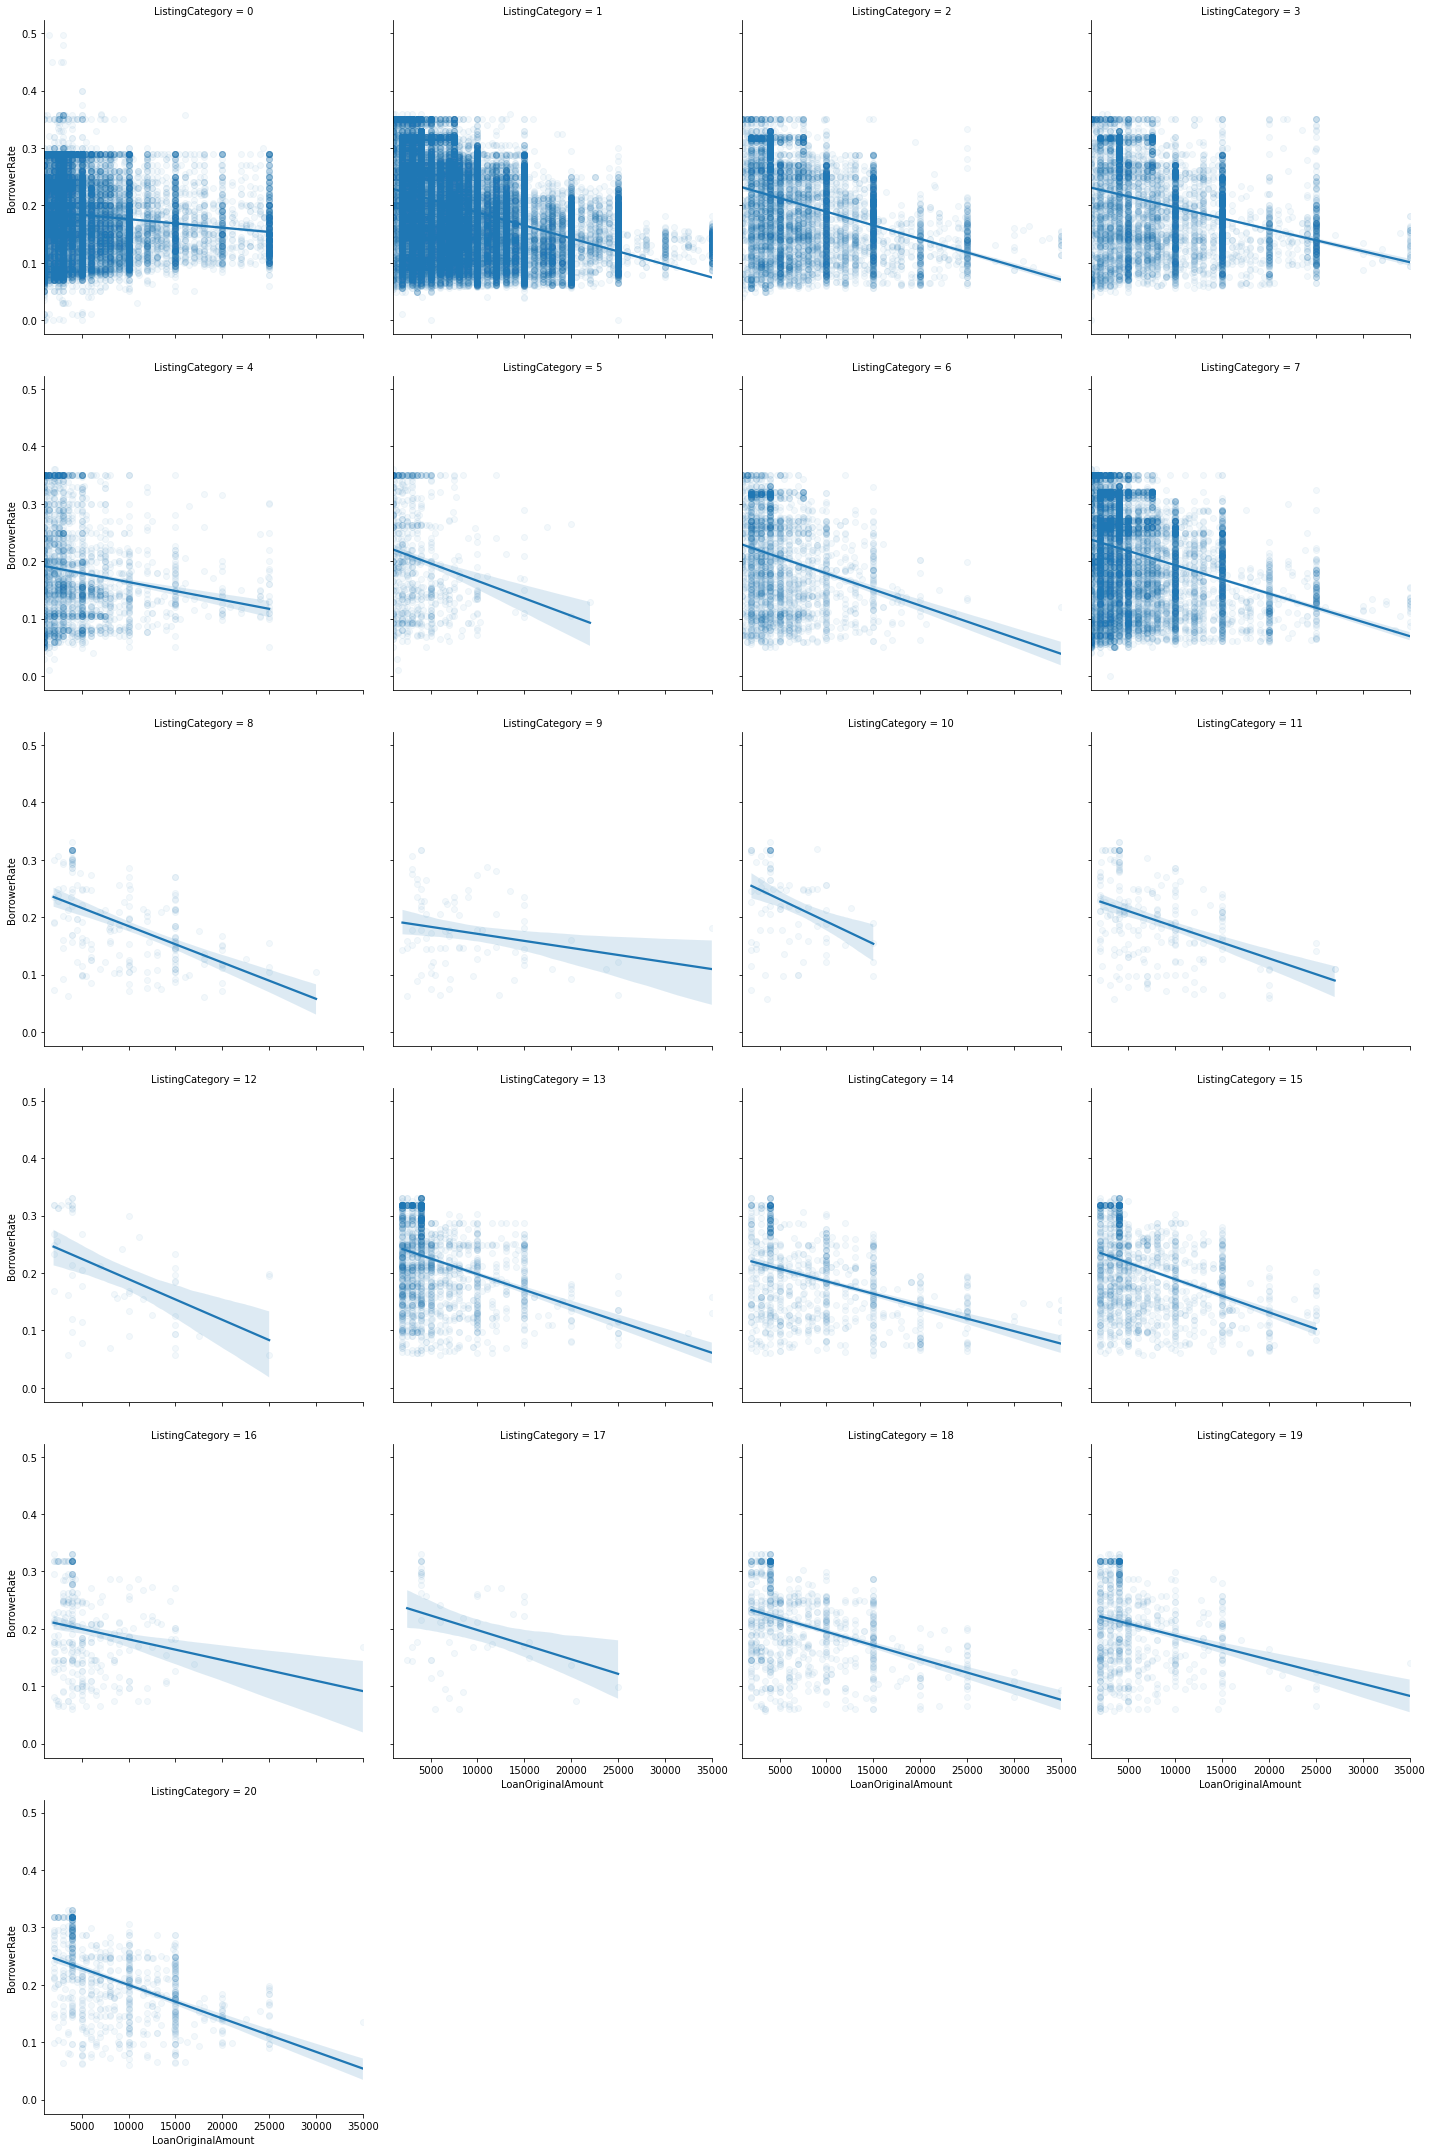

In [43]:
#plotting the effect of ListingCategory on the relation between LoanOriginalAmount and BorrowerRate
g = sb.FacetGrid(data = df_sub, col = 'ListingCategory', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha':0.05});

> listing category has no significant effect on the loan amount vs interest rate relationship.

### ListingCategory vs StatedMonthlyIncome vs interest rate

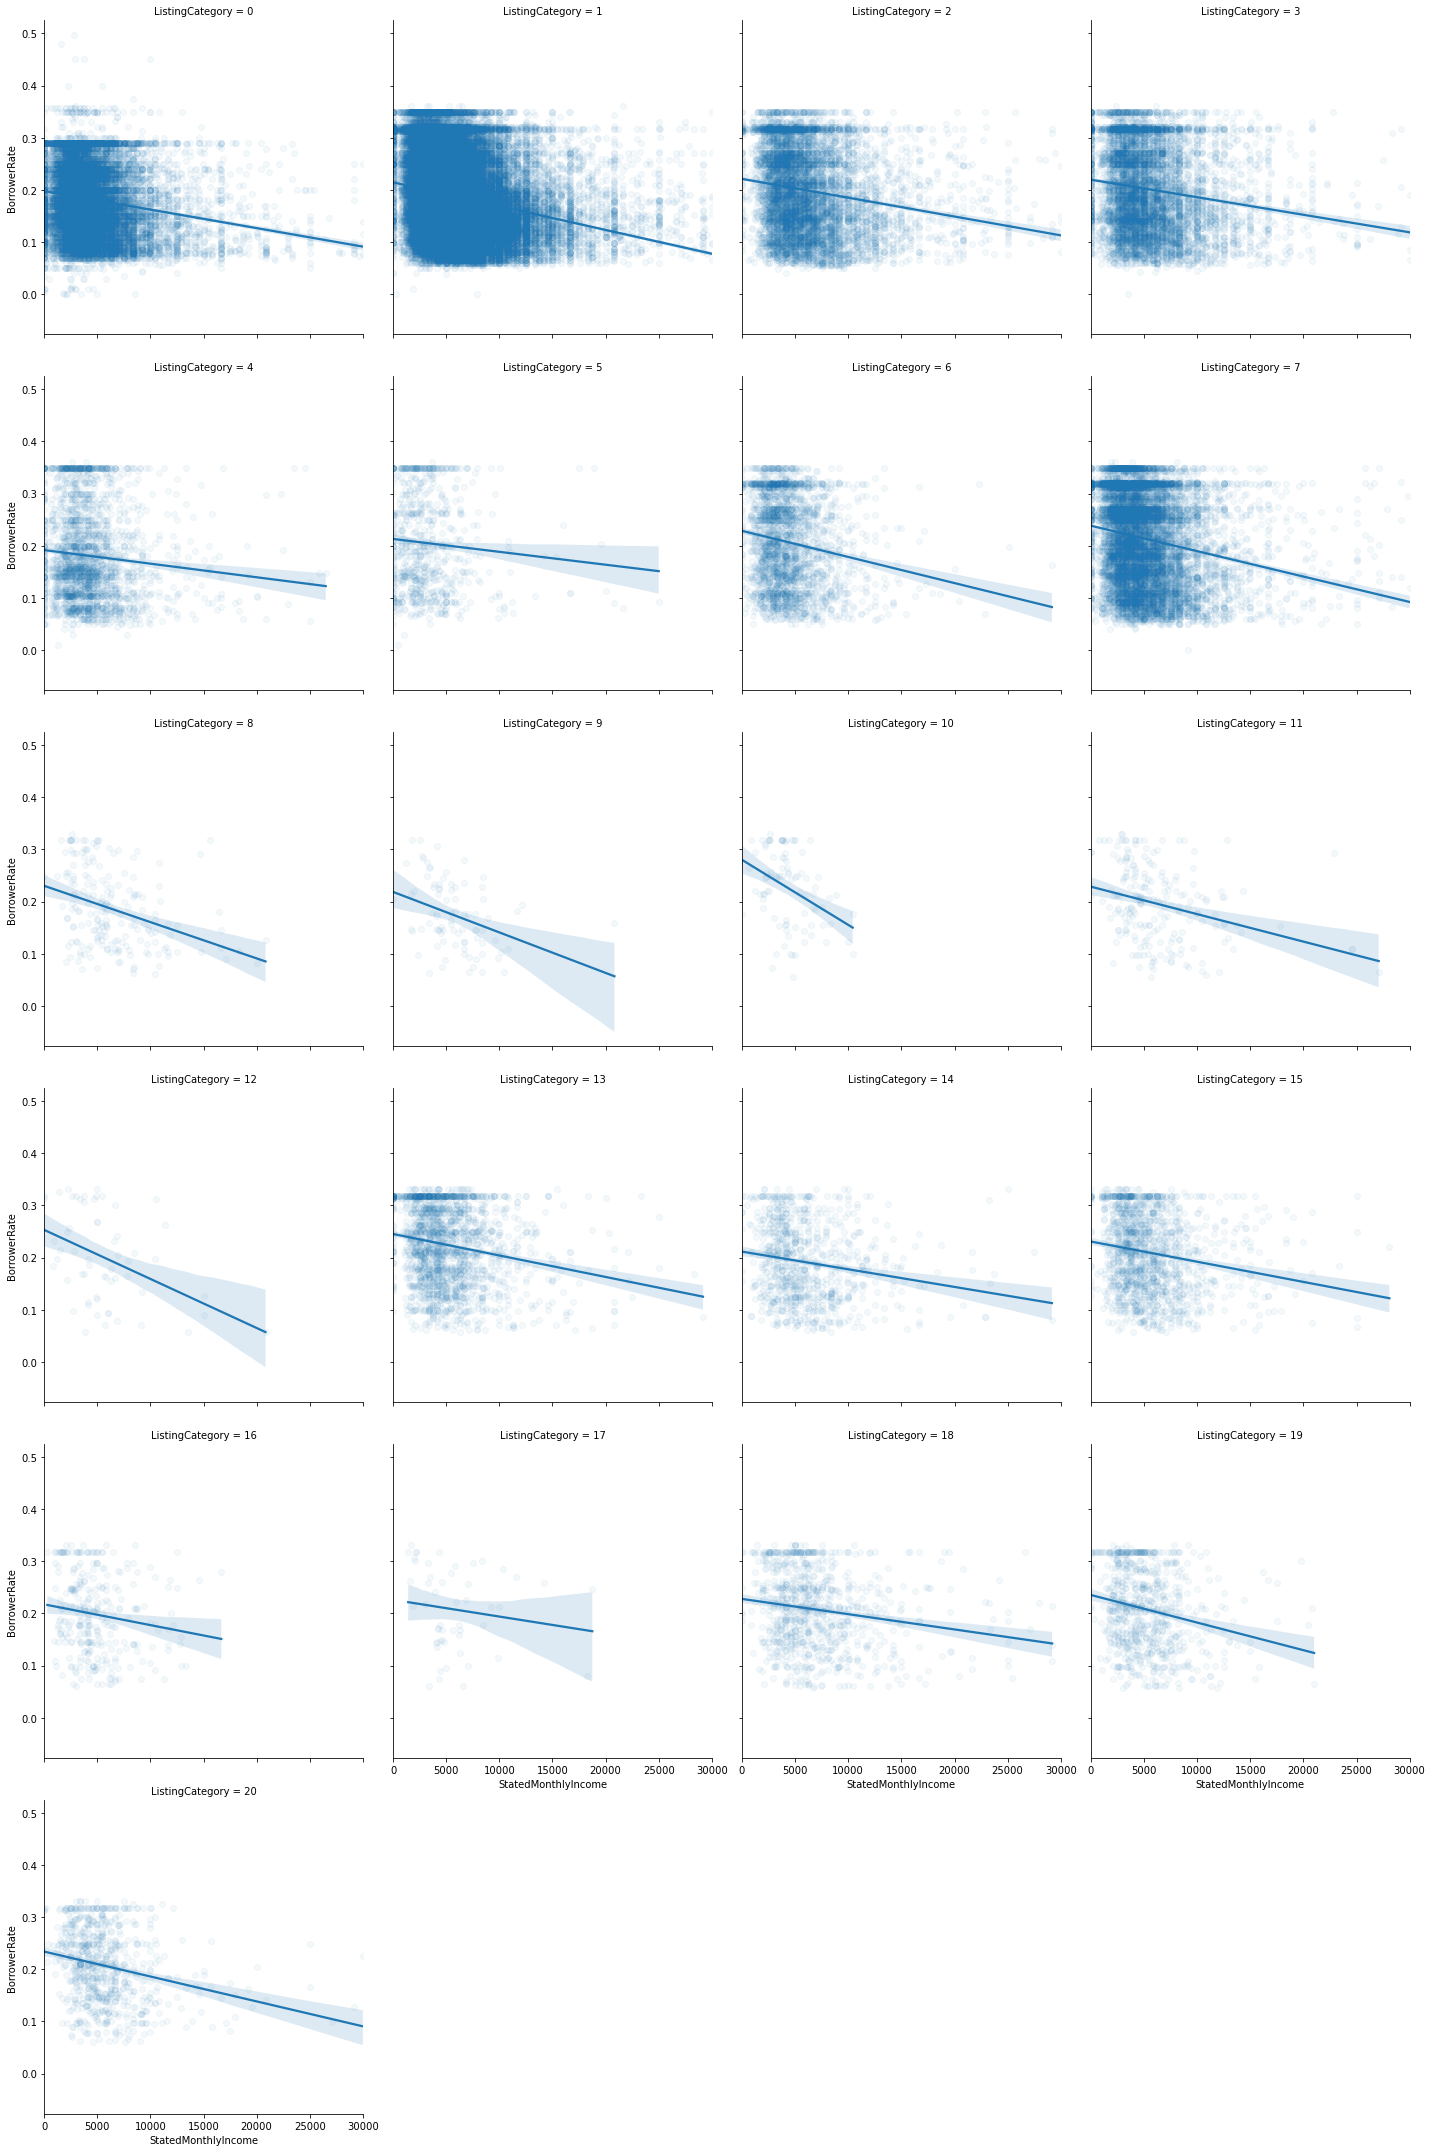

In [44]:
#plotting the effect of ListingCategory on the relation between StatedMonthlyIncome and BorrowerRate
g = sb.FacetGrid(data = df_sub, col = 'ListingCategory', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerRate', scatter_kws={'alpha':0.05});

>listing category has no significant effect on the relation between the income and the borrower's interest rate.

### interest rate vs original amount vs employment status

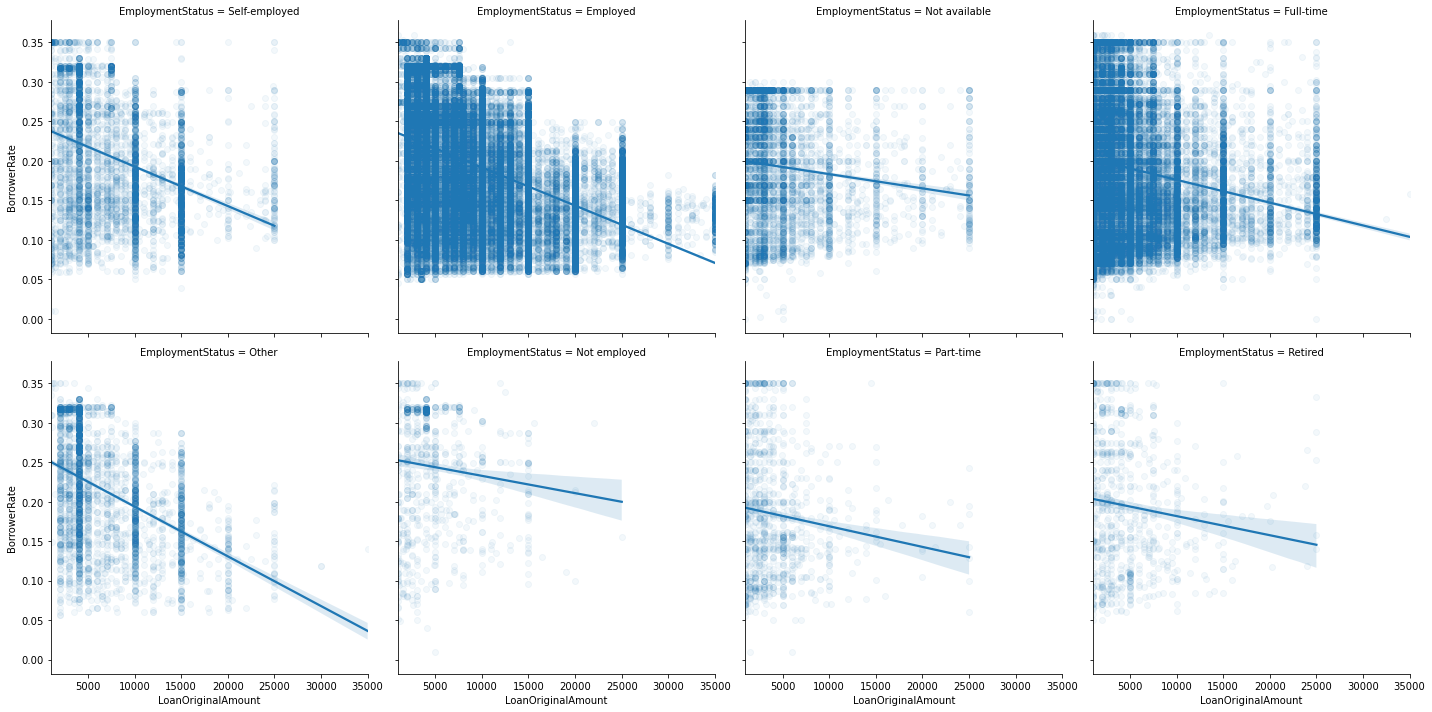

In [45]:
#plotting the effect of employment status on the relation between LoanOriginalAmount and BorrowerRate

g = sb.FacetGrid(data = df_sub, col = 'EmploymentStatus', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha':0.05});

> part-time and not employed borrowers shows a less negative relationship between interest rate and the original amount of the loan 

### interest rate vs monthly income vs employment status

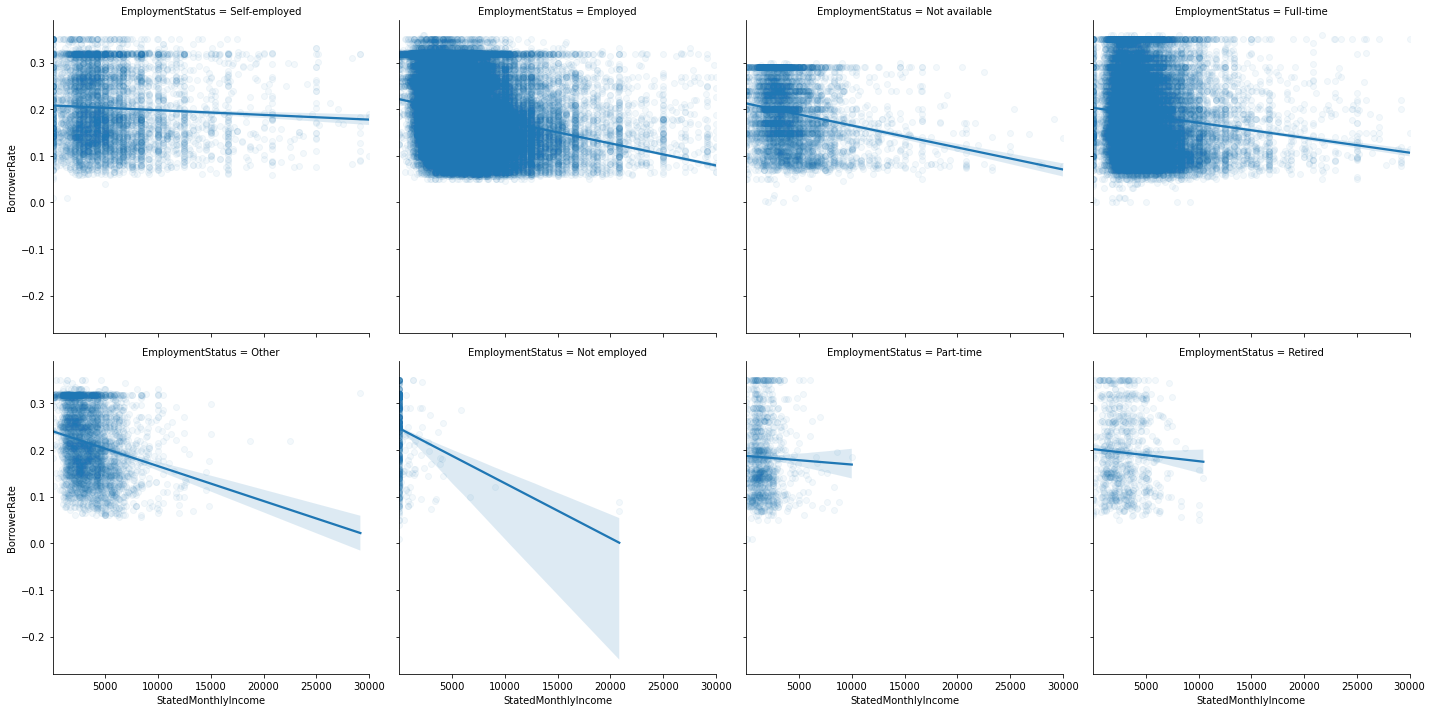

In [46]:
#plotting the effect of employment status on the relation between StatedMonthlyIncome and BorrowerRate

g = sb.FacetGrid(data = df_sub, col = 'EmploymentStatus', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerRate', scatter_kws={'alpha':0.05});

>self-employed borrowers show less negative relationship between interest rate and the monthly income of the borrower.

### interest rate vs loan amount vs prosper rating 

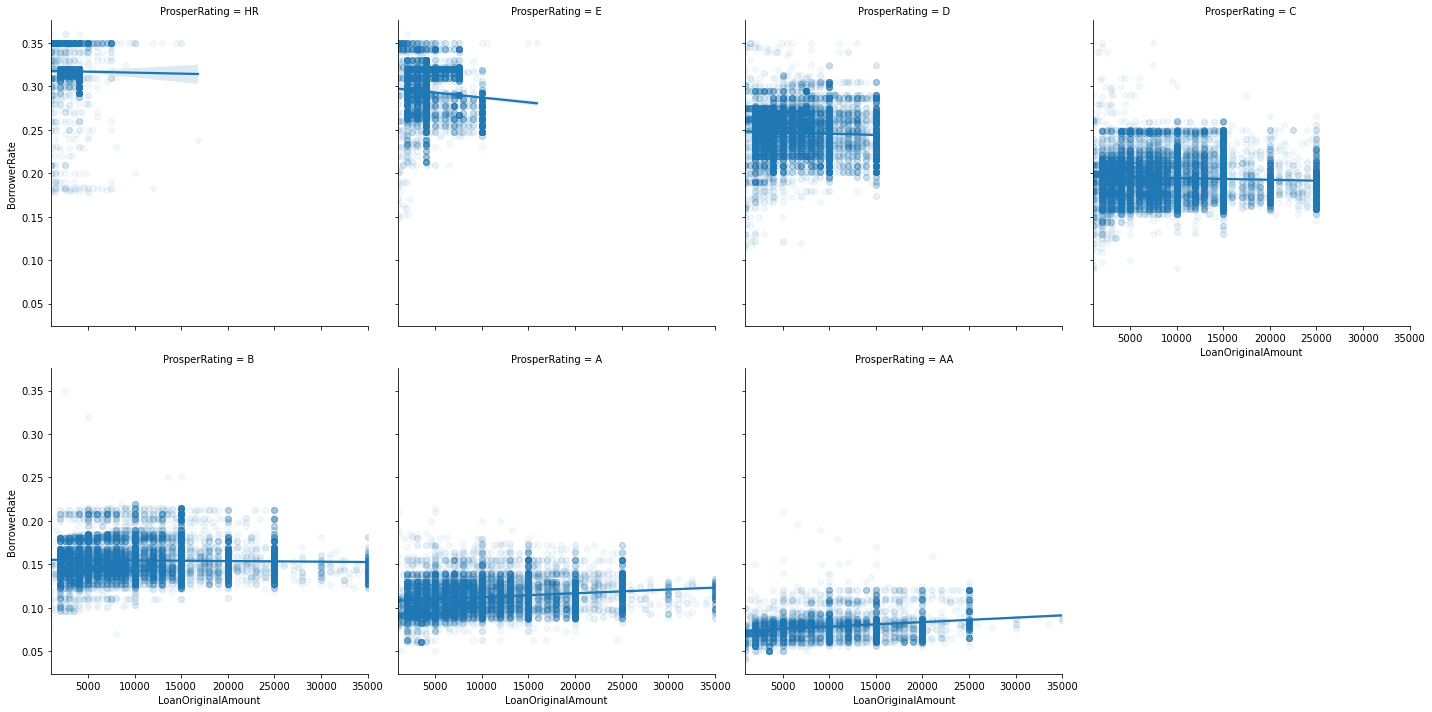

In [47]:
#plotting interest rate vs loan amount vs prosper rating
g = sb.FacetGrid(data = df_sub, col = 'ProsperRating', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha':0.05});

>the higher the risk level, the more positive the relation between the interest rate and the loan original amount.

### interest rate vs monthly income vs prosper rating

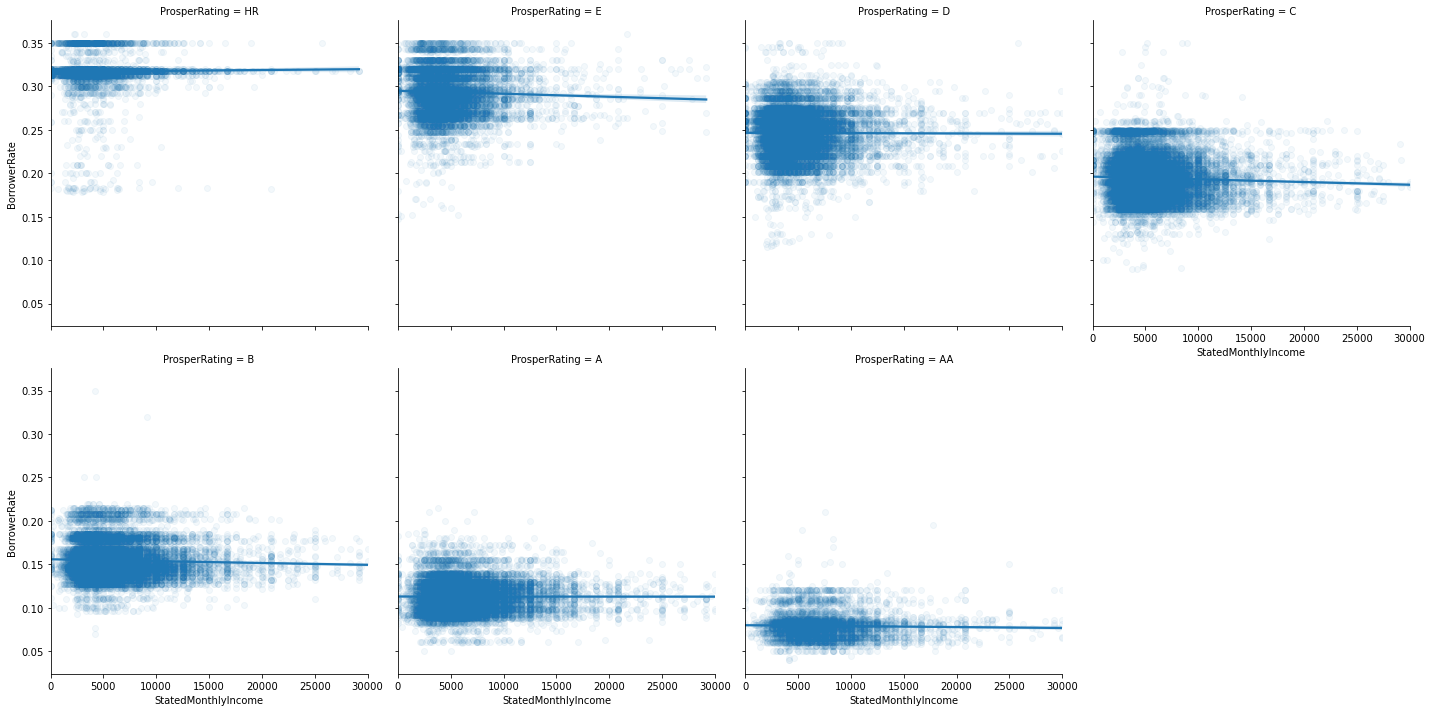

In [48]:
#interest rate vs monthly income vs prosper rating
g = sb.FacetGrid(data = df_sub, col = 'ProsperRating', height = 5, col_wrap=4,
                margin_titles = True)
g.map(sb.regplot, 'StatedMonthlyIncome', 'BorrowerRate', scatter_kws={'alpha':0.05});


>prosper rating has no signifcant effect on the relation between the interest rate and the monthly income of the borrower.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the correlation betweent interest rate of the borrower and both the original amount of the loan and the monthly income of the borrower is negative. thus, i started investiagting what would affect this relationship. part-time and not employed borrowers shows a less negative relationship between interest rate and the original amount of the loan.self-employed borrowers show less negative relationship between interest rate and the monthly income of the borrower. Listing category and term had no significant effect on these relationships. the higher the risk level(Prosper rating), the more positive the relation between the interest rate and the loan original amount. however, it has no significant effect on the relation between the interest rate and the monthly income of the borrower. 
### Were there any interesting or surprising interactions between features?

> surprisingly, the original amount and length of the loan increase with the increase of the risk level. in addition, The interest rate of the borrower increase with the increase of the term and prosper rating. 